<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/band3_rad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

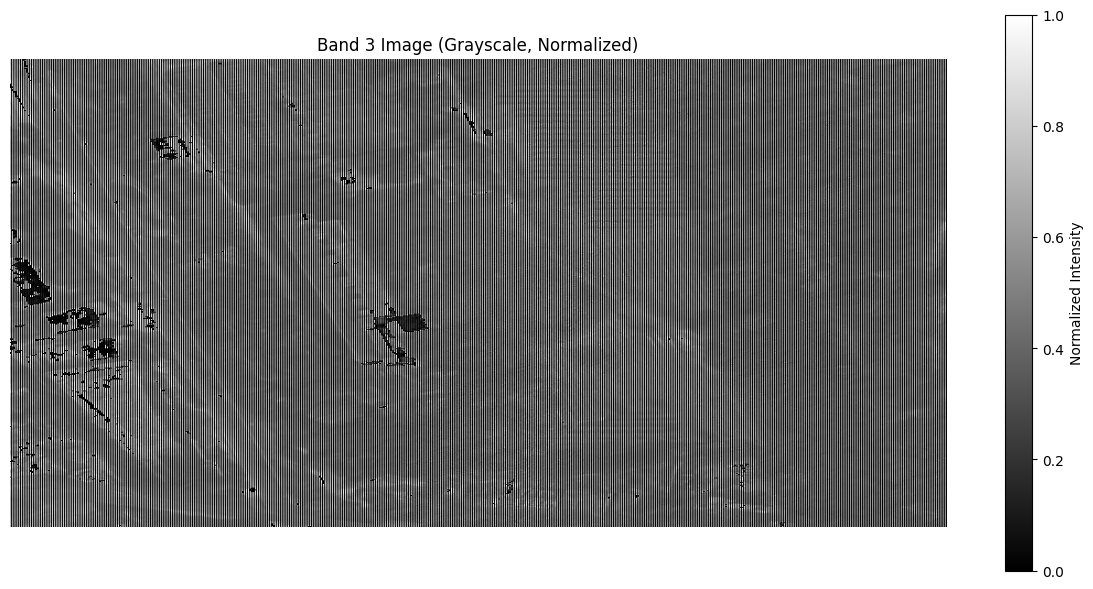

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .rad file as binary data
file_path = '/content/band3_image1.rad'
image_shape = (512, 1024)  # Corrected: height x width

# Load and reshape the image
with open(file_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.uint8)
image = data.reshape(image_shape)

# Normalize the image
normalized_image = image / 255.0

# Visualize using matplotlib
plt.figure(figsize=(12, 6)) # Adjust figure size for wider image
plt.imshow(normalized_image, cmap='gray')
plt.title('Band 3 Image (Grayscale, Normalized)')
plt.colorbar(label='Normalized Intensity')
plt.axis('off')
plt.tight_layout()
plt.show()

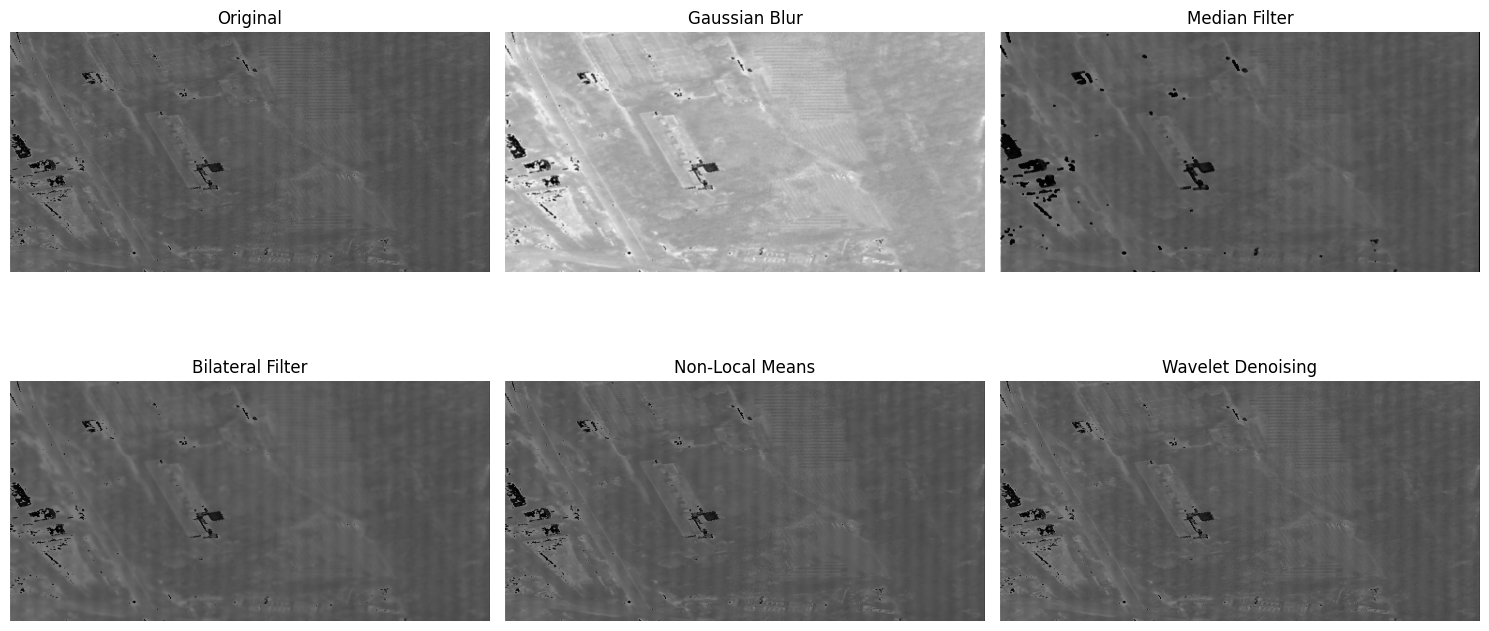

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, denoise_nl_means, estimate_sigma
from skimage import img_as_float

# Load the image
file_path = '/content/band3_image1.rad'
image_shape = (512, 1024)  # height, width

# Read and normalize
with open(file_path, 'rb') as f:
    image = np.fromfile(f, dtype=np.uint8).reshape(image_shape)
normalized = image / 255.0
image_float = img_as_float(normalized)

# Apply Denoising Techniques
denoised_gaussian = cv2.GaussianBlur(image_float, (5, 5), sigmaX=1)
denoised_median = cv2.medianBlur((image_float * 255).astype(np.uint8), 5) / 255.0
denoised_bilateral = cv2.bilateralFilter((image_float * 255).astype(np.uint8), 9, 75, 75) / 255.0
sigma_est = np.mean(estimate_sigma(image_float, channel_axis=None))
denoised_nlm = denoise_nl_means(image_float, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=6, channel_axis=None)
denoised_wavelet = denoise_wavelet(image_float, method='BayesShrink', mode='soft', rescale_sigma=True)

# Plot all results
titles = [
    "Original", "Gaussian Blur", "Median Filter",
    "Bilateral Filter", "Non-Local Means", "Wavelet Denoising"
]
images = [
    image_float, denoised_gaussian, denoised_median,
    denoised_bilateral, denoised_nlm, denoised_wavelet
]

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

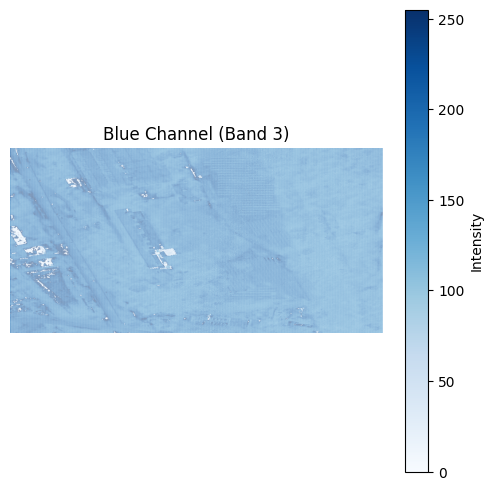

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .rad image as grayscale (Blue channel)
def load_rad_image(path, shape=(512, 1024)):  # Adjust shape if needed
    with open(path, 'rb') as f:
        image = np.fromfile(f, dtype=np.uint8).reshape(shape)
    return image

# Load Blue Channel
blue_channel = load_rad_image('/content/band3_image1.rad')

# Visualize using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel (Band 3)")
plt.axis('off')
plt.colorbar(label='Intensity')
plt.show()